In [54]:
import sys
sys.path.append("./function_scripts")
from log_reg_fns import perform_grid_search

import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split

%matplotlib inline

plt.rcParams.update({'font.size': 14})

from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn import model_selection

In [2]:
random_state = 69

In [3]:
with open('all_data_to_model.pickle', 'rb') as f:
    project_df = pickle.load(f)

In [4]:
#project_df.head()

In [5]:
#project_df.info()

In [6]:
project_df.funding_percent = project_df.funding_percent.apply(lambda x: 1 if x>=1.0 else 0)
project_df.funding_percent.value_counts()

0    36917
1    18891
Name: funding_percent, dtype: int64

In [7]:
X = project_df.drop(columns=['funding_percent'])
y = project_df.funding_percent

#### Split into train, validation and test sets:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=random_state)

In [9]:
X_train.head()

,description_length,n_pledges,pledge_level_min,pledge_level_max,pledge_level_stddev,funding_goal,duration,Comics,Crafts,Dance,...,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Sculpture,Technology,Theater
25847,274,2,9.306406,93.064061,41.878827,2326.601528,30,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5123,178,5,10.000000,500.000000,178.594513,2500.000000,51,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41376,358,8,10.000000,1000.000000,317.400944,12000.000000,32,0,0,0,...,0,1,0,0,0,0,0,0,0,0
31758,144,3,10.000000,50.000000,16.996732,625.000000,30,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19561,67,3,20.000000,100.000000,32.998316,1000.000000,60,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## Evaluating performance of different Logistic Regression models

##### Basic Logistic Regression model (using l2 regularization with reg penalty C=1)

In [10]:
logreg = LogisticRegression(C=1)
logreg.fit(X_train, y_train)
y_predicted = logreg.predict(X_val)

In [11]:
print('mean accuracy is {}'.format(logreg.score(X_val,y_val)))
conf_mat = confusion_matrix(y_val, y_predicted)
print(conf_mat)

mean accuracy is 0.7020477815699658
[[7079  608]
 [2884 1149]]


In [12]:
kfold = model_selection.KFold(n_splits=10, random_state=42)
model = LogisticRegression(C=0.1)
scoring = 'roc_auc'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: mean= {}, stddev = {}".format(results.mean(), results.std()))

AUC: mean= 0.7631943622816664, stddev = 0.009188224986707037


In [13]:
results

array([0.76324432, 0.759175  , 0.77375221, 0.77376122, 0.74531277,
       0.76806244, 0.76114555, 0.75906836, 0.75329729, 0.77512446])

In [14]:
logreg.coef_

array([[ 7.80971606e-04,  4.02359200e-02, -7.24249677e-03,
         5.20665357e-04, -1.58115837e-03, -3.12473911e-05,
        -3.03790830e-02,  3.09399828e-04, -4.97195823e-04,
         2.81016895e-04,  7.80913520e-05, -7.34683439e-04,
         6.91989055e-04, -8.89811582e-04, -4.32312027e-04,
        -1.79043487e-04,  2.02163514e-03, -4.65907832e-04,
        -1.07612585e-03, -4.05533879e-05, -8.85261615e-04,
         6.16886075e-04]])

### Using Grid Search to select hyperparameters for different model specifications

#### Basic Logistic Regression

In [15]:
#Ridge/l2 regularization, checking for best C
params = {'C': [0.1, 0.5, 1, 10, 50, 100]}
basic_ridge_lr, basic_ridge_AUC = perform_grid_search(X_train,y_train,X_val, y_val, params)

best params  {'C': 0.5}
best train AUC score:  0.7599623635422789
best confusion matrix: 
[[7079  608]
 [2882 1151]]
validation AUC score:  0.6031504559867111
best_model_coefs:
[('description_length', 0.000780734772723971),
 ('n_pledges', 0.040276753089694),
 ('pledge_level_min', -0.007222638614969774),
 ('pledge_level_max', 0.0005208420523598949),
 ('pledge_level_stddev', -0.0015818735455923436),
 ('funding_goal', -3.125103333912146e-05),
 ('duration', -0.030386504270301467),
 ('Comics', 0.000309727667250025),
 ('Crafts', -0.0004977362558667211),
 ('Dance', 0.00028134709253850945),
 ('Design', 7.819981271481384e-05),
 ('Fashion', -0.0007354917142047236),
 ('Film & Video', 0.0006928295836765812),
 ('Food', -0.0008907578440763124),
 ('Games', -0.0004328132889451658),
 ('Journalism', -0.00017923769594356957),
 ('Music', 0.0020240104488954327),
 ('Photography', -0.0004663985901597823),
 ('Publishing', -0.0010772669440455708),
 ('Sculpture', -4.059911544978593e-05),
 ('Technology', -0.0008

In [58]:
basic_ridge_AUC

0.6031504559867111

#### Using standard scalar

In [18]:
ssX = StandardScaler()
X_train_scaled = pd.DataFrame(ssX.fit_transform(X_train))
X_val_scaled = pd.DataFrame(ssX.transform(X_val))
X_test_scaled = pd.DataFrame(ssX.transform(X_test))

In [21]:
#Ridge/l2 regularization, checking for best C
params = {'C': [0.1, 0.5, 1, 10, 50, 100]}
scaled_ridge_lr, scaled_ridge_AUC = perform_grid_search(X_train_scaled,y_train,X_val_scaled,y_val, params)

best params  {'C': 100}
best train AUC score:  0.7869231618206524
best confusion matrix: 
[[6878  809]
 [2308 1725]]
validation AUC score:  0.6612393409374611
best_model_coefs:
[(0, 0.34858794672020676),
 (1, 0.798906540667231),
 (2, -0.7298823213014332),
 (3, 0.26132243968406915),
 (4, -0.37807721273269757),
 (5, -39.47906524725696),
 (6, -0.26416251292567894),
 (7, -0.005092485549303414),
 (8, -0.141244024454858),
 (9, 0.09402773469575948),
 (10, -0.03540050985165149),
 (11, -0.1613709278884092),
 (12, 0.04151192341687029),
 (13, -0.1344584068374904),
 (14, -0.11419244302483163),
 (15, -0.08096428188755064),
 (16, 0.16403193692479484),
 (17, -0.10492792707646079),
 (18, -0.14257505668126302),
 (19, -0.045673888538346474),
 (20, -0.14972150373995102),
 (21, 0.13133556059527787)]


In [22]:
print(basic_ridge_AUC, scaled_ridge_AUC)

0.6031504559867111 0.6612393409374611


###### Standard scaling of independent variables seems to yield much better results. I will keep it for the following models.

#### Using Standard Scalar with Lasso vs Ridge Regularization

In [56]:
# using Lasso(l1) regularization, checking for best C
params = {'penalty': ['l1'], 'C': [0.1, 0.5, 1, 10, 50, 100]}
scaled_lasso_lr, scaled_lasso_AUC = perform_grid_search(X_train_scaled,y_train,X_val_scaled,y_val, params)

best params  {'C': 100, 'penalty': 'l1'}
best train AUC score:  0.7871621676241439
best confusion matrix: 
[[6875  812]
 [2303 1730]]
validation AUC score:  0.6616640922355443
best_model_coefs:
[(0, 0.3507144109201599),
 (1, 0.8010966325663652),
 (2, -0.7249706867436355),
 (3, 0.2659481907615808),
 (4, -0.3784659405738435),
 (5, -40.55705473021657),
 (6, -0.2629945102430074),
 (7, -0.0052092743897612535),
 (8, -0.1412200407069772),
 (9, 0.09416288249163905),
 (10, -0.033944567231598985),
 (11, -0.1608055669689668),
 (12, 0.042352648339368394),
 (13, -0.13356945863305883),
 (14, -0.11320679969040567),
 (15, -0.08068640525671532),
 (16, 0.16415459685730677),
 (17, -0.10478547194706372),
 (18, -0.14254778553976452),
 (19, -0.045602276251372434),
 (20, -0.14762331808398702),
 (21, 0.13164769112973718)]


In [57]:
print(scaled_ridge_AUC, scaled_lasso_AUC)

0.6612393409374611 0.6616640922355443


###### Lasso seems to show minor improvement over ridge. but this may change as I modify other hyperparameters. I'll test both for the following models.

#### Getting rid of extreme funding_goal outliers

In [24]:
X_train.quantile(.95)

description_length      1479.000000
n_pledges                 18.000000
pledge_level_min          48.336298
pledge_level_max       10000.000000
pledge_level_stddev     2761.781820
funding_goal           82958.023842
duration                  60.000000
Comics                     0.000000
Crafts                     0.000000
Dance                      0.000000
Design                     1.000000
Fashion                    1.000000
Film & Video               1.000000
Food                       1.000000
Games                      1.000000
Journalism                 0.000000
Music                      1.000000
Photography                0.000000
Publishing                 1.000000
Sculpture                  0.000000
Technology                 1.000000
Theater                    0.000000
Name: 0.95, dtype: float64

In [25]:
X_train_cutoff = X_train[X_train.funding_goal <= 100000]

In [28]:
X_train_cutoff_scaled = pd.DataFrame(ssX.fit_transform(X_train))

In [29]:
# now using X_train with outliers above 99% funding goal removed. Checking l1/l2 regularization, C regularization values.
params = {'penalty': ['l1','l2'], 'C': [0.1, 0.5, 1, 10, 50, 100]}
outliersrmvd_lr, outliersrmvd_AUC = perform_grid_search(X_train_cutoff_scaled, y_train, X_val_scaled, y_val, params)

best params  {'C': 100, 'penalty': 'l1'}
best train AUC score:  0.7871616603948077
best confusion matrix: 
[[6875  812]
 [2303 1730]]
validation AUC score:  0.6616640922355443
best_model_coefs:
[(0, 0.35072488797860646),
 (1, 0.8011344492288036),
 (2, -0.724942340675136),
 (3, 0.2658138464021344),
 (4, -0.3783449675783009),
 (5, -40.55673290850325),
 (6, -0.262995373618215),
 (7, -0.005213469946754743),
 (8, -0.14122185077211846),
 (9, 0.09416318754022),
 (10, -0.03394631238781149),
 (11, -0.16080684944832446),
 (12, 0.04236126250000562),
 (13, -0.133567457791721),
 (14, -0.11321072619794688),
 (15, -0.0806860262834801),
 (16, 0.16415666759777423),
 (17, -0.10478565018444286),
 (18, -0.1425490279307277),
 (19, -0.04560232695204935),
 (20, -0.14762318791212103),
 (21, 0.13164905435592447)]


In [30]:
print(scaled_lasso_AUC, outliersrmvd_AUC)

0.6616640922355443 0.6616640922355443


###### Removing projects with super high funding goals does not seem to have improved accuracy at all. I will keep these projects in my data.

#### Using a weight to help balance classes (which have an approximate 2:1 ratio)

In [31]:
# Using Standard Scaled X values.
# Checking class=balanced/unbalanced, l1/l2 regularization, C regularization values.
params = {'penalty': ['l1','l2'], 'C': [0.1, 0.5, 1, 10, 50, 100, 150, 300, 500, 1000], 'class_weight': [None, 'balanced']}
balanced_lr, balanced_AUC = perform_grid_search(X_train_scaled, y_train, X_val_scaled, y_val, params)

best params  {'C': 1000, 'class_weight': 'balanced', 'penalty': 'l1'}
best train AUC score:  0.7873143913250054
best confusion matrix: 
[[5573 2114]
 [1123 2910]]
validation AUC score:  0.723268739288279
best_model_coefs:
[(0, 0.37829284595701534),
 (1, 0.8561122343934259),
 (2, -0.723347182297394),
 (3, 0.27212748954983546),
 (4, -0.3928912606703453),
 (5, -38.77444540142483),
 (6, -0.266332493311835),
 (7, -0.01302008468200962),
 (8, -0.14390921953625907),
 (9, 0.09334719057692659),
 (10, -0.041866237388362273),
 (11, -0.16534645967536374),
 (12, 0.02787508036380342),
 (13, -0.1439810951941036),
 (14, -0.1234147699175381),
 (15, -0.08182626197302789),
 (16, 0.15398110288592573),
 (17, -0.10736214532641836),
 (18, -0.14601396932689764),
 (19, -0.047267300378388076),
 (20, -0.15404048806276407),
 (21, 0.13132373999377378)]


In [32]:
print(scaled_lasso_AUC, balanced_AUC)

0.6616640922355443 0.723268739288279


###### Wow! Changing our class weights to balance our number of observations improved our AUC massively! Let's keep it

#### Converting funding_goal and category variables to interaction terms

###### instead of a 1 in the relevant category, insert funding goal into category columns. Drop funding goal column. This might illuminate the different relationships between funding goal and funded/not-funded for different categories. (EG art projects probably don't get funded if they ask for a lot of money, but tech projects may not get funded if they ask for too little). Note: we must add 'Art' category back in.

In [33]:
with open('all_data_clean_original.pickle', 'rb') as f:
    df_full = pickle.load(f)
    

##### Get dummies from category
###### Note that "Art" is no longer dropped

In [34]:
dummy_columns = pd.get_dummies(df_full.category, drop_first=False)

In [35]:
df_full =pd.concat([df_full,dummy_columns], axis=1)
df_full.drop(columns=['category'], inplace=True)

##### Add in funding % and get rid of columns we will not use in our models

In [36]:
df_to_model = df_full
df_to_model.drop(columns=['kickstarter_page', 'start_date', 'n_backers'], inplace=True)

In [37]:
df_to_model['funding_percent'] = df_to_model.funding_actual / df_to_model.funding_goal
project_df.funding_percent = project_df.funding_percent.apply(lambda x: 1 if x>=1.0 else 0)
df_to_model.drop(columns=['funding_actual'], inplace=True)
project_df.funding_percent.value_counts()

0    36917
1    18891
Name: funding_percent, dtype: int64

In [38]:
category_cols = ['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video',
       'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing',
       'Sculpture', 'Technology', 'Theater']
for catcol in category_cols:
    df_to_model[catcol] = df_to_model['funding_goal'] * df_to_model[catcol]
    
df_to_model.drop(columns='funding_goal', inplace=True)

##### Convert funding percent to boolean

In [39]:
df_to_model.funding_percent = df_to_model.funding_percent.apply(lambda x: 1 if x>=1.0 else 0)
df_to_model.funding_percent.value_counts()

0    36917
1    18891
Name: funding_percent, dtype: int64

In [40]:
X2 = df_to_model.drop(columns=['funding_percent'])
y2 = df_to_model.funding_percent

##### Split into train, validation and test sets:

In [41]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=random_state)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.3, random_state=random_state)

##### Standardize independent variables
###### Note: now each category's funding goals will be normalized separately, reflecting distribution of funding goals for that category specifically

In [44]:
ssX = StandardScaler()
X2_train_scaled = pd.DataFrame(ssX.fit_transform(X2_train))
X2_val_scaled = pd.DataFrame(ssX.transform(X2_val))

##### Reestimating best model using grid search on data with funding_goal/category interactions

In [45]:
# Using Standard Scaled X values.
# Checking class=balanced/unbalanced, l1/l2 regularization, C regularization values.
balanced_interaction_lr, balanced_interaction_AUC = perform_grid_search(X2_train_scaled, y2_train, X2_val_scaled, y2_val)

best params  {'C': 1000, 'class_weight': None, 'penalty': 'l1'}
best train AUC score:  0.7791349184123177
best confusion matrix: 
[[6947  740]
 [2556 1477]]
validation AUC score:  0.6349810950512957
best_model_coefs:
[(0, 0.31922926036090704),
 (1, 0.8518999492372028),
 (2, -0.6696565143989045),
 (3, 0.2864011667281268),
 (4, -0.3578247711787779),
 (5, -0.26202692863518423),
 (6, -1.0065791022028168),
 (7, -35.36160786433617),
 (8, -2.9672224634166344),
 (9, -0.6655362163739479),
 (10, -0.89204736644104),
 (11, -2.0350665835495407),
 (12, -22.615012355958786),
 (13, -2.9375562654409633),
 (14, -3.2011869581862746),
 (15, -2.176689090662124),
 (16, -0.5216470042188133),
 (17, -0.18218030024221119),
 (18, -10.411358988775348),
 (19, -0.14480908781929358),
 (20, -23.05976280883593),
 (21, -0.10644074432131424)]


In [46]:
print(balanced_AUC, balanced_interaction_AUC)

0.723268739288279 0.6349810950512957


###### No luck! adding interactions did not improve my model.

### Best Model: Lasso Regularized Logistic Regression with low penalty weight (high C)
###### Evaluating model based on test set:

In [47]:
params = {'penalty': 'l1', 'C': 1000, 'class_weight': 'balanced'}
best_logreg = LogisticRegression(penalty='l1', C = 1000, class_weight = 'balanced')
best_logreg.fit(X_train_scaled, y_train)
best_logreg.coef_

array([[ 3.78288065e-01,  8.56074255e-01, -7.23444772e-01,
         2.72439990e-01, -3.93225519e-01, -3.87756862e+01,
        -2.66333637e-01, -1.30153432e-02, -1.43909694e-01,
         9.33469295e-02, -4.18623646e-02, -1.65345611e-01,
         2.78698535e-02, -1.43982035e-01, -1.23409154e-01,
        -8.18263112e-02,  1.53979424e-01, -1.07363179e-01,
        -1.46014487e-01, -4.72670159e-02, -1.54037401e-01,
         1.31323325e-01]])

In [55]:

y_pred = best_logreg.predict(X_test_scaled)
    
conf_mat = confusion_matrix(y_test, y_pred)
print('best confusion matrix: ')
print(conf_mat)
print('ROC-AUC score on test set: ', roc_auc_score(y_test, y_pred))

coefficients = list(zip(X_train.columns, best_logreg.coef_[0]))
print('best_model_coefs:')

pprint(coefficients)


best confusion matrix: 
[[7970 3189]
 [1578 4006]]
ROC-AUC score on test set:  0.7158142906223176
best_model_coefs:
[('description_length', 0.3782880649637784),
 ('n_pledges', 0.8560742546096921),
 ('pledge_level_min', -0.72344477197342),
 ('pledge_level_max', 0.27243998963092253),
 ('pledge_level_stddev', -0.3932255191602238),
 ('funding_goal', -38.775686203353814),
 ('duration', -0.2663336370391366),
 ('Comics', -0.01301534316845161),
 ('Crafts', -0.14390969373502863),
 ('Dance', 0.09334692945394596),
 ('Design', -0.041862364578285904),
 ('Fashion', -0.16534561071879833),
 ('Film & Video', 0.02786985349344509),
 ('Food', -0.14398203522747616),
 ('Games', -0.12340915440123502),
 ('Journalism', -0.0818263112365227),
 ('Music', 0.15397942391525501),
 ('Photography', -0.10736317857150676),
 ('Publishing', -0.14601448714704102),
 ('Sculpture', -0.04726701593310973),
 ('Technology', -0.15403740107733582),
 ('Theater', 0.1313233247973564)]


In [49]:
coefficients.sort(key=lambda x: abs(x[1]), reverse=True)

In [50]:
coefficients

[('funding_goal', -38.775686203353814),
 ('n_pledges', 0.8560742546096921),
 ('pledge_level_min', -0.72344477197342),
 ('pledge_level_stddev', -0.3932255191602238),
 ('description_length', 0.3782880649637784),
 ('pledge_level_max', 0.27243998963092253),
 ('duration', -0.2663336370391366),
 ('Fashion', -0.16534561071879833),
 ('Technology', -0.15403740107733582),
 ('Music', 0.15397942391525501),
 ('Publishing', -0.14601448714704102),
 ('Food', -0.14398203522747616),
 ('Crafts', -0.14390969373502863),
 ('Theater', 0.1313233247973564),
 ('Games', -0.12340915440123502),
 ('Photography', -0.10736317857150676),
 ('Dance', 0.09334692945394596),
 ('Journalism', -0.0818263112365227),
 ('Sculpture', -0.04726701593310973),
 ('Design', -0.041862364578285904),
 ('Film & Video', 0.02786985349344509),
 ('Comics', -0.01301534316845161)]

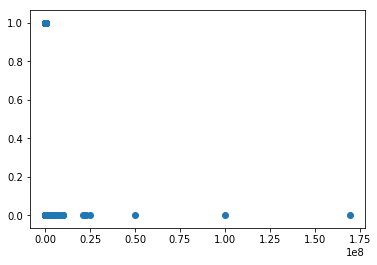

In [51]:
plt.scatter(X_test.funding_goal,y_test)

In [ ]:
with open('all_data_to_model.pickle', 'rb') as f:
    plot_df = pickle.load(f)
X_plt = plot_df.drop(columns=['funding_percent'])
y_plt = plot_df.funding_percent
X_plt_train, X_plt_test, y_plt_train, y_plt_test = train_test_split(X_plt, y_plt, test_size=0.3, random_state=random_state)
X_plt_train, X_plt_val, y_plt_train, y_plt_val = train_test_split(X_plt_train, y_plt_train, test_size=0.3, random_state=random_state)

In [ ]:
plot_x = X_plt_test.funding_goal.reset_index()
plot_y = y_plt_test.reset_index()
plot_points = pd.concat([plot_x, plot_y], axis=1).drop(columns=['index'])
#plot_points.sort_values(by='funding_percent', ascending=False, inplace=True)
plot_x = plot_points.funding_goal
plot_y = plot_points.funding_percent
color_key = pd.Series(y_pred)
colorization = color_key.apply(lambda x: 'xkcd:blue green' if x == 1 else 'xkcd:dark peach')

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(plot_x, plot_y, alpha=0.3, c=colorization)
plt.ylim((0,2.5))
plt.xlim((0,3e5))
plt.xlabel('Funding Goal (USD)')
plt.ylabel('% Funded')
ax.set_yticklabels(['0%','50%','100%', '150%','200%', '250%'])
plt.tight_layout()

plt.savefig('fund_goal_vs_percent_test.png')

In [ ]:
plt.scatter(X.funding_goal,y_plt, alpha=0.2)
plt.ylim((0,2.5))
plt.xlim((0,1e5))
plt.xlabel('Funding Goal (USD)')
plt.ylabel('% Funded')
plt.savefig('fund_goal_vs_percent_all_data.png')

In [ ]:
pred_probs = pd.DataFrame(best_logreg.predict_proba(X_test)[:,1], columns=['prob_funded'])
X_test_reset = X_test.reset_index()
to_plot=pd.concat([X_test_reset.funding_goal,pred_probs], axis=1)

In [ ]:
to_plot.sort_values(by='funding_goal',inplace=True)
jitter_y = to_plot.prob_funded + np.random.normal(0, 0.02, len(to_plot.prob_funded))
fig = plt.figure(figsize=(6,2))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(to_plot.funding_goal.values, jitter_y, alpha=0.3, c='xkcd:blue green')
ax.set_xscale('log')
plt.yticks([0,1])
plt.ylabel('Prediction')
plt.xlabel('Funding Goal (USD)')
#plt.xlim(0,1e3)
plt.xticks([10,1000,10**5,10**7])
ax.set_xticklabels(['10', '1000', '100,000', '10,000,000']);
plt.tight_layout()
plt.savefig('funding_goal_vs_prediction.png')